### 2021_11_01_2 3

## PCA(Principal component analysis)
* 주성분 분석은 특징들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술이다.
* 데이터의 회전 후에 데이터 설명도에 따라 얼마나 중요한가가 판단되고, 새로운 데이터 중의 일부 데이터가 선택된다.
* 통계적으로 상관관계가 없도록 회전하여 성분을 만든다.
* 주성분1을 찾는다. 분산이 가장 크고, 데이터를 가장 잘 표현하는 성분
* 주성분2를 찾는다.


In [1]:
import mglearn

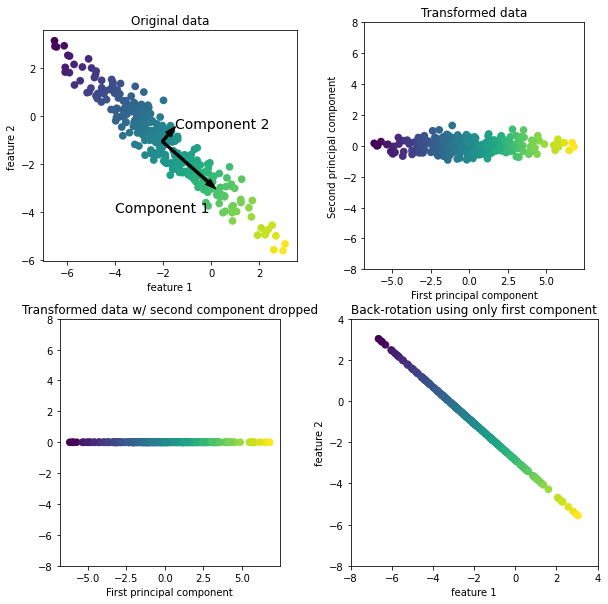

In [2]:
mglearn.plots.plot_pca_illustration()

### 네개의 그래프는 주성분 1을 찾아가는 과정을 보여준다.
### 첫번째 그래프
* 원본 데이터의 주성분 1, 2를 찾는다.
### PCA 알고리즘
* STPE 1. PCA 알고리즘은 제일 먼저 '성분1'의 분산이 가장 큰 방향을 찾는다.
    * 이 방향(또는 벡터)이 데이터에서 가장 많은 정보를 담고 있는 방향이 된다.
    * 또 다른 말로 특성들의 상관관계가 가장 큰 방향입니다.
* STEP 2. 첫 번째 주성분(방향)과 직각인 방향 중, 가장 많은 정보를 담는 방향을 찾는다.(두번째 주성분)
    * 만약 특성이 2개인 2차원에서는 직각방향이 하나만 존재,
    * 특성이 여러개인 고차원에서는 첫번째 성분과 직각을 이루는 것은 무한히 많을 수 있다.
* STEP 3. 이어 같은 방법으로 성분을 찾아간다.
* 이런 과정을 거쳐 찾은 방향의 데이터에 있는 주된 분산의 방향이라고 해서 주성분이라 한다.
    * 일반적으로 원본 특성 개수만큼의 주성분이 있다.

### 두번째 그래프
* (가) 첫번째와 같은 데이터이지만, 주성분 1이 x축이 되도록 회전. 회전하기 전에 데이터에서 평균을 확인하여 중심을 원점을 맞춤.
* (나) PCA에 의해 회전된 두 축은 수직을 이루고, 독립적이다. 독립적이므로 상관관계 행렬(correlation matrix)이 대각선 방향을 제외하고 0이된다.

* 상관 관계 행렬의 예

1 0 0
0 1 0
0 0 1

### PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용.

### 세번째 그래프
* (가) 세번째 그래프는 첫 번째 주성분만 유지시킴. 2차원 -> 1차원으로 감소
    * 주성분 1(PC1) 위로 데이터를 투영시키기
    * 원본 특성중 하나만 남기는 것이 아닌 가장 유용한 방향을 찾은 주성분1만 유지.
    
### 네번째 그래프
* (가) 다시 데이터에 평균을 더해서 반대로 회전.
* (나) 이 데이터 포인트들은 원래 특징(feature) 공간에 있지만 2번째 주성분을 없앴기에 첫번째 주성분만 담고 있다.

#### 이러한 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화

### PCA를 적용한 유방암 데이터셋 시각화
* 특성이 많을 때는 산점도 행렬을 적용하기 어렵다. 이 특성은 435개의 산점도를 그려야 합니다.
* 이 보다 쉬운 방법은 양성과 악성 두 클래스에 대해 각 특성의 히스토그램을 그리는 것이다.

In [3]:
### 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np

### PCA를 적용하여 유방암 데이터 셋 시각화하기
### 유방암 특성들을 히스토그램 시각화를 이용하여 특성을 확인(악성.양성정보 포함)

In [5]:
cancer = load_breast_cancer()

# 악성 종양(malignant) : 1
# 양성 종양(benign) : 0
cancer.target_names, cancer.target[0:15]

(array(['malignant', 'benign'], dtype='<U9'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [6]:
malignant = cancer.data[cancer.target == 1]
benign = cancer.data[cancer.target == 0]

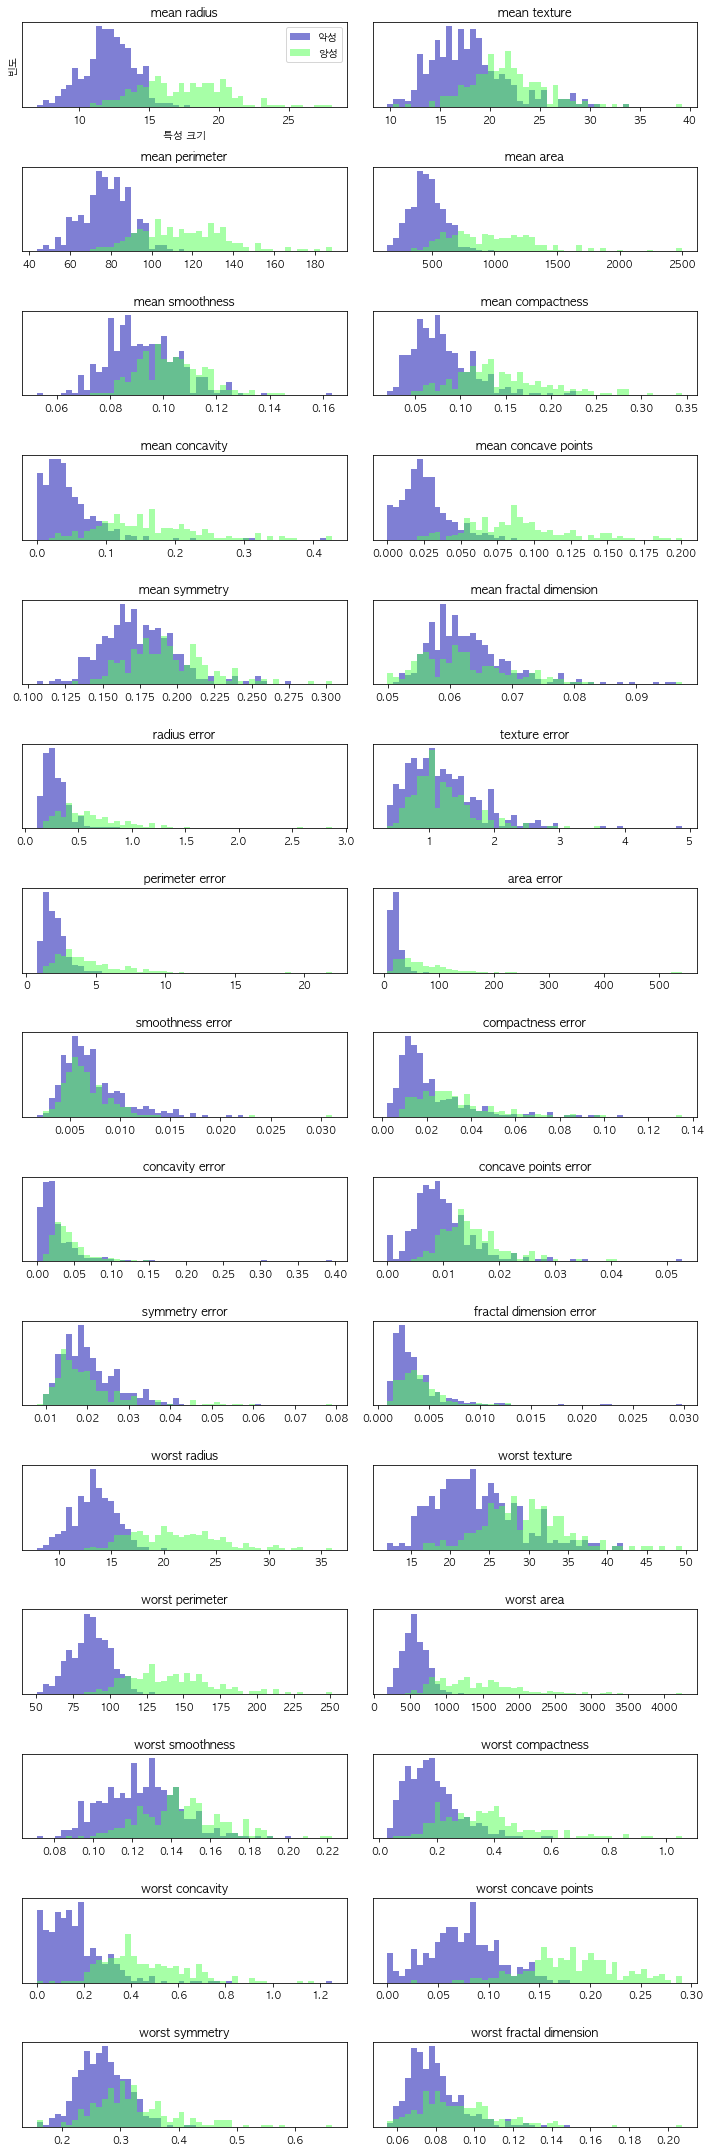

In [14]:
fig, axes = plt.subplots(15, 2, figsize = (10, 30))
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc = "best")
fig.tight_layout()

* 히스토그램을 두개 겹쳐 놓은 것으로
    * 초록색은 양성 클래스의 포인트, 보라색은 악성 클래스의 포인트를 나타낸다.
* 이를 통해 어떤 특성이 양성과 악성을 구분하는 데 더 좋은지 가늠해 볼 수 있습니다.
    * 'smoothness error'는 거의 겹쳐서 별로 쓸모가 없음.
    * 'worst concave points'는 두 히스토그램이 확실히 구분되어 매우 유용한 특성

### 데이터 전처리 및 PCA 변환
### 데이터 변환 - 표준화

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler().fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

### PCA 적용
* PCA 변환을 학습하고 적용하는 것.
    * (1) PCA 객체를 생성하고, 몇개의 성분을 사용할 것인가?
    * (2) fit 메서드를 호출하여 주성분을 찾고,
    * (3) transform 메서드를 호출하여 데이터를 회전시키고 차원 축소
        * 기본값일 때는 PCA는 데이터를 회전만(이동)만 시키고 모든 주성분을 유지한다.

In [16]:
# 데이터의 처음 두 개 주성분만 유지
pca = PCA(n_components = 2)

# 유방암 데이터로 PCA 모델 생성
pca.fit(X_scaled)

# 주어진 PCA 이용하여 두 개의 주성분을 가져온다.
x_pca = pca.transform(X_scaled)
print("원본 데이터 형태 : {}".format(X_scaled.shape))
print("축소된 데이터 형태 : {}".format(x_pca.shape))

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


Text(0, 0.5, '두 번째 주성분')

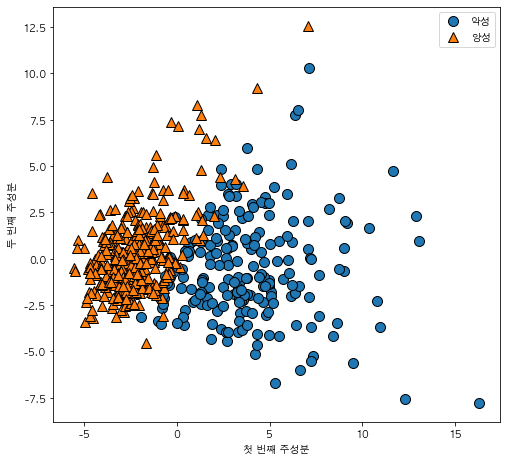

In [22]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 표시
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(x_pca[:, 0], x_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

### 주성분 확인
* 주성분 1 : pca.components_[0]
* 주성분 2 : pca.components_[1]

In [25]:
print("PCA 주성분 형태 : ", pca.components_.shape)
print("PCA 주성분 : ", pca.components_)

PCA 주성분 형태 :  (2, 30)
PCA 주성분 :  [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

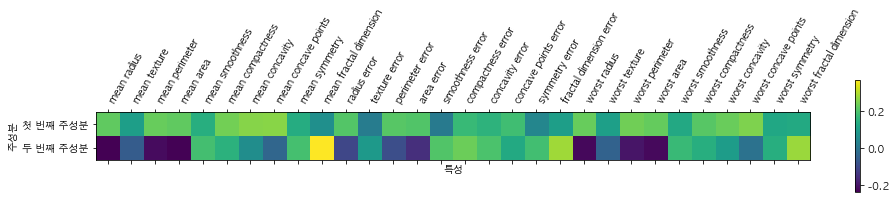

In [26]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

### 주성분 5개를 지정하고 이 요소에 대한 내용을 그래표로 표시

In [29]:
pca = PCA(n_components = 5)

# 유방암 데이터로 PCA 모델 생성
pca.fit(X_scaled)

# 주어진 PCA 이용하여 두 개의 주성분을 가져온다.
x_pca = pca.transform(X_scaled)
print("원본 데이터 형태 : {}".format(X_scaled.shape))
print("축소된 데이터 형태 : {}".format(x_pca.shape))

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 5)


PCA 주성분 형태 :  (5, 30)


Text(0, 0.5, '주성분')

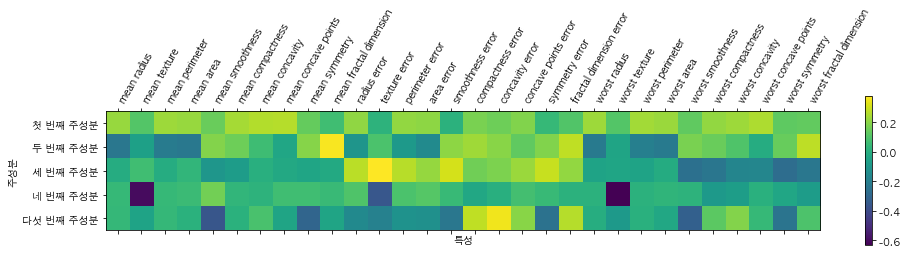

In [34]:
print("PCA 주성분 형태 : ", pca.components_.shape)
# print("PCA 주성분 : ", pca.components_)

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3, 4], ["첫 번째 주성분", "두 번째 주성분", 
                             "세 번째 주성분", "네 번째 주성분", 
                            "다섯 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation = 60, ha = 'left')
plt.xlabel("특성")
plt.ylabel("주성분")